## Preprocessing

In [1]:
# TODO: comment
import pandas as pd
import numpy as np
#
import warnings
warnings.filterwarnings("ignore")
#

In [2]:
# TODO: comment
path_to_file = "../data/Component_Faults_Data.csv"
df = pd.read_csv(path_to_file)

In [3]:
# TODO: comment
x = df.iloc[:, :48].values
y = df["class"].values.reshape(-1, 1)

In [4]:
# TODO: comment
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [5]:
# TODO: comment
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [6]:
# TODO: comment
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

## Data Exploration

In [7]:
# TODO: stats

In [8]:
# TODO: plot

## Newer Solution for testing NN-Configuration

In [12]:
# TODO: comment
# Imports for class
import sys
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

""" 
    The following class helps in streamlining the building, training, and testing of a Neural Network (NN)
    With it, we can see the effect on the result for changing a single parameter 
    So we only have to provide the name of the parameter we have to change, and the values we want to test it with
"""
class NeuralNetworkParameterTester:

    # The config holds all the changeable parameters for building, training and testing the NN
    config = {
        'input_layer_dim': 48,
        'output_layer_dim': 11,
        'number_of_hidden_layers': 1,
        'number_of_units_per_layer': 10,
        'epochs': 100,
        'batch_size': 64,
        'activation_function': 'relu',
        'loss_function': 'categorical_crossentropy',
        'optimizer': 'sgd'}

    
    div_param_name = None  # Name of the div parameter
    div_param_val = None  # Values of the div parameter
    
    result = []  # Result of the test
    
    # The following shows how a result may look like:
    #
    # [
    #    [
    #        'test_param_val': 1,
    #        'params': [
    #            'input_layer_dim': 48,
    #            'output_layer_dim': 11,
    #            'activation_function': 'relu',
    #            'loss_function': 'mean_squared_error',
    #            'optimizer': 'sgd',
    #            'number_of_hidden_layers': 1,
    #            'number_of_units_per_layer': 10]
    #        'result': [
    #            'model': model,
    #            'acurracy': 0.923
    #        ]
    #    ],
    #    [
    #        'test_param_val': 2,
    #        'params': [
    #            'input_layer_dim': 48,
    #            'output_layer_dim': 11,
    #            'activation_function': 'relu',
    #            'loss_function': 'mean_squared_error',
    #            'optimizer': 'sgd',
    #            'number_of_hidden_layers': 2,
    #            'number_of_units_per_layer': 10]
    #        'result': [
    #            'model': model,
    #            'acurracy': 0.923
    #        ]
    #    ],
    #   [...........]
    # ]
    
    """
        This class requires two paramters:
        "test_param_name": is the name of the parameter on which we want to see what changing it's value does to the result
        "test_param_val":  is a list of integer or string values
    """
    def __init__(self, test_param_name, test_param_val):
        
        if test_param_name is not None and isinstance(test_param_name, str):
            self.test_param_name = test_param_name
            if test_param_val is not None and isinstance(test_param_val, list):
                self.test_param_val = test_param_val
                self.config[self.test_param_name] = self.test_param_val
            else:
                print("'test_param_val' must be of type list")
                sys.exit(0)
        else:
            print("'test_param_name' must be of type str")
            sys.exit(0)
        
    def run(self):
        
        for val in self.config[self.test_param_name]:
            # prepare config for individual test
            test_config = self.config  
            test_config[self.test_param_name] = val
        
            model = self.__build(test_config)
            trained_model, history = self.__train(test_config, model)
            accuracy = self.__test(trained_model)
            
            # save result
            self.result.append({"test_param_val": val, 
                                'params': test_config.copy(), 
                                "result": {'model': trained_model, 
                                           'accuracy': accuracy}})

    def __build(self, test_config):

        # Sequential model (Basic NN)
        model = Sequential()        
        # Building of input layer
        model.add(Dense(test_config['number_of_units_per_layer'], 
                        input_dim=test_config['input_layer_dim'], 
                        activation=test_config['activation_function']))
        # Building of hidden layer(s)
        for i in range(test_config['number_of_hidden_layers']):
            model.add(Dense(test_config['number_of_units_per_layer'], 
                            activation=test_config['activation_function']))
        # Building of output layer
        model.add(Dense(test_config['output_layer_dim'], 
                        activation="softmax"))
        # ?
        model.compile(loss=test_config['loss_function'], 
                      optimizer=test_config['optimizer'], 
                      metrics=['accuracy'])
        return model

    def __train(self, test_config, model):
        # xtrain and ytrain is the data from preprocessing
        history = model.fit(x_train, 
                            y_train, 
                            epochs=test_config['epochs'], 
                            batch_size=test_config['batch_size'])             
        return model, history
    
    
    # TODO: look at this method more closely. So far just copy paste
    @staticmethod
    def __test(model):
        y_pred = model.predict(x_test)
        # Converting predictions to label
        pred = list()
        for i in range(len(y_pred)):
            pred.append(np.argmax(y_pred[i]))
        # Converting one hot encoded test label to label
        test = list()
        for i in range(len(y_test)):
            test.append(np.argmax(y_test[i]))

        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(pred, test)
        return accuracy
                                    
                                    
    # Setter methods for setting single parameters
    def set_number_of_hidden_layers(self, val):
        self.config["number_of_hidden_layers"] = val
        
    def set_number_of_units_per_layer(self, val):
        self.config["number_of_units_per_layer"] = val
        
    def set_activation_function(self, val):
        self.config["activation_function"] = val
        
    def set_epochs(self, val):
        self.config["epochs"] = val
        
    def set_batch_size(self, val):
        self.config["batch_size"] = val
        
    def set_loss_function(self, val):
        self.config["loss_function"] = val
        
    def set_optimizer(self, val):
        self.config["optimizer"] = val
        
    # This method is helpful if you just want to reset the changes you made to the parameters
    def reset_config(self):
        config = {
            'input_layer_dim': 48,
            'output_layer_dim': 11,
            'number_of_hidden_layers': 1,
            'number_of_units_per_layer': 10,
            'epochs': 100,
            'batch_size': 64,
            'activation_function': 'relu',
            'loss_function': 'categorical_crossentropy',
            'optimizer': 'sgd'}
        
        config[self.test_param_name] = self.test_param_val
        self.config = config
        
    # This method plots the result without needing any input from the user
    def plot_result(self, dim=2):
        if dim == 2:
            self.__plot_2d()

    def __plot_2d(self):

        # TODO: improve plot

        test_param_val = [element['test_param_val'] for element in self.result]
        accuracy_result = [element['result']['accuracy'] for element in self.result]

        plt.scatter(test_param_val, accuracy_result)
        plt.plot(test_param_val, accuracy_result, linestyle='--')
        plt.title("Accuracy per " + "'" + self.test_param_name + "'")
        plt.ylabel("Accuracy")
        plt.xlabel(self.test_param_name)
        plt.show()
        # TODO : plot as table
        print('"test_param_val":\t', test_param_val)
        print('"accuracy_result":\t', accuracy_result)

## Test NN with parameters

In [13]:
nnpt = NeuralNetworkParameterTester(test_param_name="number_of_units_per_layer", test_param_val=[2, 3, 4])

In [14]:
nnpt.config

{'input_layer_dim': 48,
 'output_layer_dim': 11,
 'number_of_hidden_layers': 1,
 'number_of_units_per_layer': [2, 3, 4],
 'epochs': 100,
 'batch_size': 64,
 'activation_function': 'relu',
 'loss_function': 'categorical_crossentropy',
 'optimizer': 'sgd'}

In [15]:
nnpt.set_number_of_hidden_layers(2)

In [16]:
nnpt.config

{'input_layer_dim': 48,
 'output_layer_dim': 11,
 'number_of_hidden_layers': 2,
 'number_of_units_per_layer': [2, 3, 4],
 'epochs': 100,
 'batch_size': 64,
 'activation_function': 'relu',
 'loss_function': 'categorical_crossentropy',
 'optimizer': 'sgd'}

In [17]:
nnpt.run()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





26329/26329 [==============================] - 1s 39us/step - loss: 2.4042 - acc: 0.0801
Epoch 2/100
26329/26329 [==============================] - 0s 15us/step - loss: 2.3995 - acc: 0.0922
Epoch 3/100
26329/26329 [==============================] - 0s 15us/step - loss: 2.3987 - acc: 0.0899
Epoch 4/100
26329/26329 [==============================] - 0s 15us/step - loss: 2.3984 - acc: 0.0932
Epoch 5/100
26329/26329 [==============================] - 0s 17us/step - loss: 2.3982 - acc: 0.0936
Epoch 6/100
26329/26329 [==============================] - 0s 15us/step - loss: 2.3981 - acc: 0.0943
Epoch 7/100
24000/26329 [==========================>...] - ETA: 0s - loss: 2.3981 - acc: 0.0943

KeyboardInterrupt: 

In [42]:
nnpt.result

[{'test_param_val': 4,
  'params': {'input_layer_dim': 48,
   'output_layer_dim': 11,
   'number_of_hidden_layers': 2,
   'number_of_units_per_layer': 4,
   'epochs': 100,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Sequential at 0x201f3b001c8>,
   'accuracy': 0.6797676008202324}},
 {'test_param_val': 8,
  'params': {'input_layer_dim': 48,
   'output_layer_dim': 11,
   'number_of_hidden_layers': 2,
   'number_of_units_per_layer': 8,
   'epochs': 100,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Sequential at 0x201f3b8fc48>,
   'accuracy': 0.950786056049214}},
 {'test_param_val': 16,
  'params': {'input_layer_dim': 48,
   'output_layer_dim': 11,
   'number_of_hidden_layers': 2,
   'number_of_units_per_layer': 16,
   'epochs': 100,
 

[4, 8, 16]
[0.6797676008202324, 0.950786056049214, 0.9760765550239234]


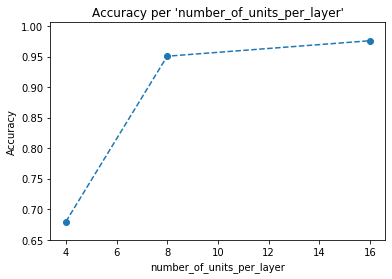

In [43]:
nnpt.plot_result()

In [ ]:
# TODO: Plot Matrix